<a href="https://colab.research.google.com/github/unjike/Modeling-and-Simulation-of-Advanced-Manufacturing-Processing/blob/main/Finite_Difference_Model_for_Joule_Heating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing usefull libraries
import numpy as np
import matplotlib.pyplot as plt
 
##initializing constants
sigma_c = 5*10**5  # S/m or kg−1⋅m−3⋅s3⋅A2  <---          Electrical conductivity (isotropic)
rho_o = 6000   # kg/m3                     <---          Density
C = 1000 # J/kgK                           <---          Heat Capacity
Kappa_o = 400  # W/m-K                     <---          Thermal conductivity (isotropic)
theta_o = 300 # K                          <---          Initial temperature
L = 0.01 # m                               <---          Domain length
E = 100 # V/m                              <---          Imposed electric field magnitude
J = sigma_c*E # A/m^2                      <---          Current density
a = 0.9 #                                  <---          Joule heating efficiency
t_f = 1 # s                                <---          Final time of simulation
dt = 10**-5 # s                            <---          Time step

#iniializing time
t=np.arange(0,t_f+10**-5, 10**-5)

# defining a function for a transient temperature distribution

def trnstempdist(n):
  '''
  This function returns a transient temperature distribution for a given number of node
  '''
  # initializing temperature
  theta = [theta_o*np.ones(n)]

  # initializing nodes
  x = np.linspace(0,0.01,n)

  # initializing node spacing
  dx = np.copy(x[1])

  # initializing matrix multiplier
  A = -2*np.identity(n)+np.eye(n, k=-1)+np.eye(n, k=1)
  A[0] = np.zeros(n)
  A[-1] = np.zeros(n)

  # evaluating joule heating term
  JH = np.ones(n)*(a*J*E)
  JH[0] = 0
  JH[-1] = 0

  # transient temperature
  for i in range(len(t)-1):
    theta.append(theta[i] + dt*Kappa_o/(rho_o*C*dx**2)*A@theta[i] + dt/(rho_o*C)*JH) 

  return theta

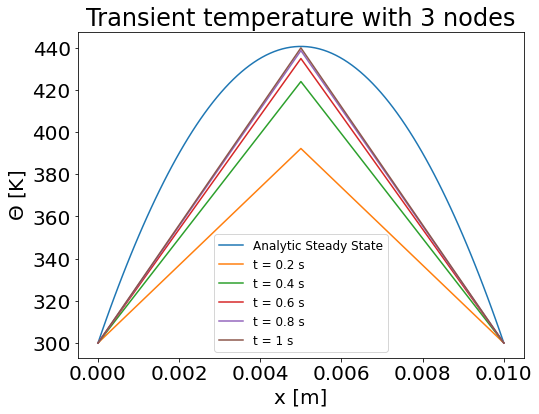

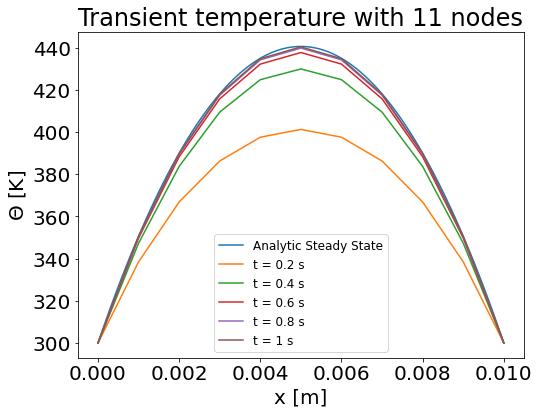

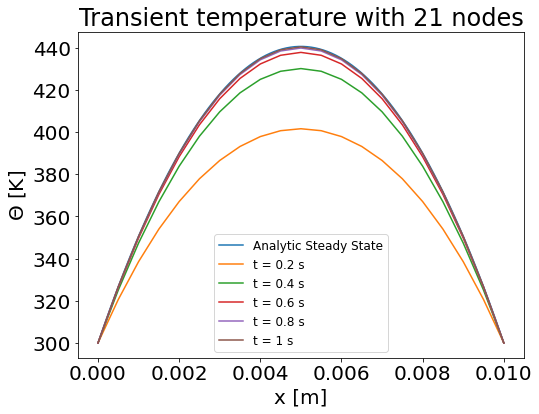

In [ ]:
ax = np.linspace(0,0.01,100)
analyticA = lambda x: -a*J*E*x**2/(2*Kappa_o) + a*J*E*L*x/(2*Kappa_o) + theta_o


for n in [3, 11, 21]:
  # for 3 nodes
  fig = plt.figure(figsize = (8,6))
  x = np.linspace(0,0.01,n)
  theta3 = trnstempdist(n)
  plt.rcParams.update({'font.size': 20})
  plt.plot(ax, analyticA(ax))
  plt.plot(x, theta3[int(t_f/(5*dt))])
  plt.plot(x, theta3[int(2*t_f/(5*dt))])
  plt.plot(x, theta3[int(3*t_f/(5*dt))])
  plt.plot(x, theta3[int(4*t_f/(5*dt))])
  plt.plot(x, theta3[int(t_f/(dt))])
  plt.xlabel('x [m]')
  plt.ylabel('$\Theta$ [K]')
  plt.legend(['Analytic Steady State', 't = 0.2 s', 't = 0.4 s', 't = 0.6 s', 't = 0.8 s', 't = 1 s'], loc='best', fontsize = 12)
  plt.title(f'Transient temperature with {n} nodes')
  plt.show()

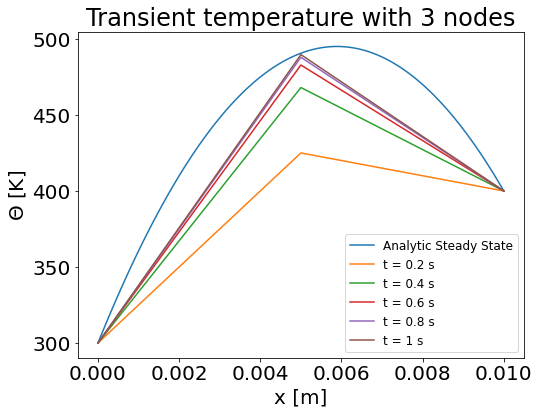

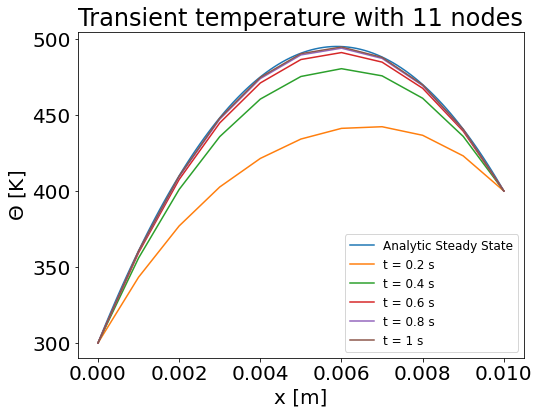

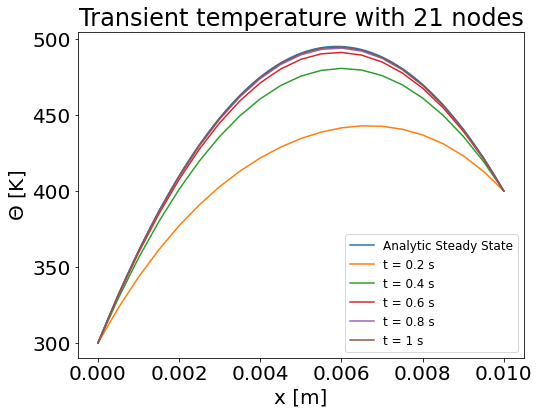

In [ ]:
def trnstempdistB(n):
  '''
  This function returns a transient temperature distribution for a given number of node
  '''
  # initializing temperature
  theta = [theta_o*np.ones(n)]
  theta[0][-1] = theta_o + 100

  # initializing nodes
  x = np.linspace(0,0.01,n)

  # initializing node spacing
  dx = np.copy(x[1])

  # initializing matrix multiplier
  A = -2*np.identity(n)+np.eye(n, k=-1)+np.eye(n, k=1)
  A[0] = np.zeros(n)
  A[-1] = np.zeros(n)

  # evaluating joule heating term
  JH = np.ones(n)*(a*J*E)
  JH[0] = 0
  JH[-1] = 0

  # transient temperature
  for i in range(len(t)-1):
    theta.append(theta[i] + dt*Kappa_o/(rho_o*C*dx**2)*A@theta[i] + dt/(rho_o*C)*JH) 

  return theta

ax = np.linspace(0,0.01,100)
analyticB = lambda x: -a*J*E*x**2/(2*Kappa_o) + (a*J*E*L/(2*Kappa_o) + 100/L)*x + theta_o


for n in [3, 11, 21]:
  # for 3 nodes
  fig = plt.figure(figsize = (8,6))
  x = np.linspace(0,0.01,n)
  thetaB = trnstempdistB(n)
  plt.rcParams.update({'font.size': 20})
  plt.plot(ax, analyticB(ax))
  plt.plot(x, thetaB[int(t_f/(5*dt))])
  plt.plot(x, thetaB[int(2*t_f/(5*dt))])
  plt.plot(x, thetaB[int(3*t_f/(5*dt))])
  plt.plot(x, thetaB[int(4*t_f/(5*dt))])
  plt.plot(x, thetaB[int(t_f/(dt))])
  plt.xlabel('x [m]')
  plt.ylabel('$\Theta$ [K]')
  plt.legend(['Analytic Steady State', 't = 0.2 s', 't = 0.4 s', 't = 0.6 s', 't = 0.8 s', 't = 1 s'], loc='best', fontsize = 12)
  plt.title(f'Transient temperature with {n} nodes')
  plt.show()

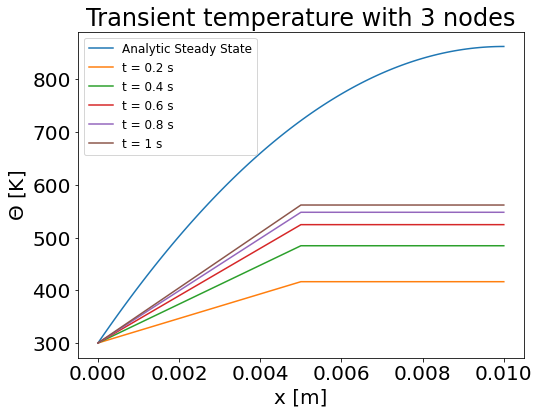

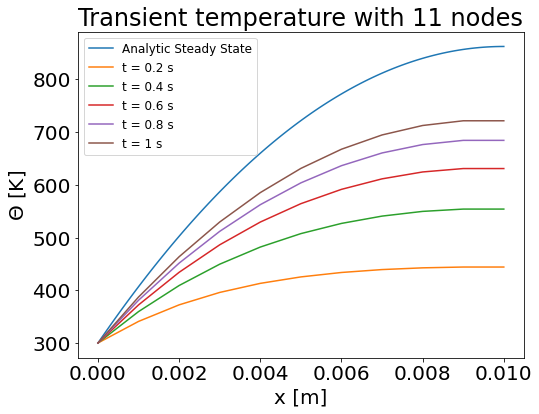

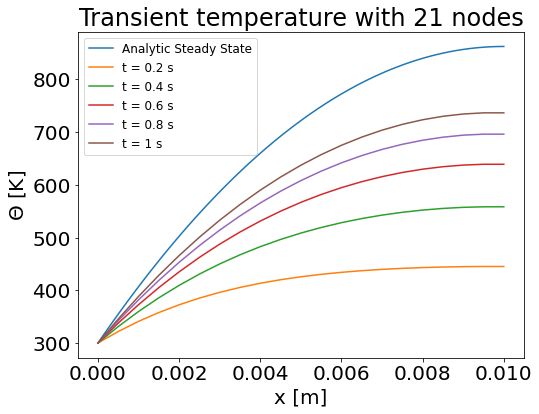

In [ ]:
def trnstempdistC(n):
  '''
  This function returns a transient temperature distribution for a given number of node
  '''
  # initializing temperature
  theta = [theta_o*np.ones(n)]

  # initializing nodes
  x = np.linspace(0,0.01,n)

  # initializing node spacing
  dx = np.copy(x[1])

  # initializing matrix multiplier
  A = -2*np.identity(n)+np.eye(n, k=-1)+np.eye(n, k=1)
  A[0] = np.zeros(n)
  A[-1] = np.zeros(n)

  # evaluating joule heating term
  JH = np.ones(n)*(a*J*E)
  JH[0] = 0
  JH[-1] = 0

  # transient temperature
  for i in range(len(t)-1):
    theta.append(theta[i] + dt*Kappa_o/(rho_o*C*dx**2)*A@theta[i] + dt/(rho_o*C)*JH)
    theta[-1][-1] = theta[-1][-2] 

  return theta


analyticC = lambda x: -a*J*E*x**2/(2*Kappa_o) + a*J*E*L/Kappa_o*x + theta_o


for n in [3, 11, 21]:
  # for 3 nodes
  fig = plt.figure(figsize = (8,6))
  x = np.linspace(0,0.01,n)
  thetaC = trnstempdistC(n)
  plt.rcParams.update({'font.size': 20})
  plt.plot(ax, analyticC(ax))
  plt.plot(x, thetaC[int(t_f/(5*dt))])
  plt.plot(x, thetaC[int(2*t_f/(5*dt))])
  plt.plot(x, thetaC[int(3*t_f/(5*dt))])
  plt.plot(x, thetaC[int(4*t_f/(5*dt))])
  plt.plot(x, thetaC[int(t_f/(dt))])
  plt.xlabel('x [m]')
  plt.ylabel('$\Theta$ [K]')
  plt.legend(['Analytic Steady State', 't = 0.2 s', 't = 0.4 s', 't = 0.6 s', 't = 0.8 s', 't = 1 s'], loc='best', fontsize = 12)
  plt.title(f'Transient temperature with {n} nodes')
  plt.show()

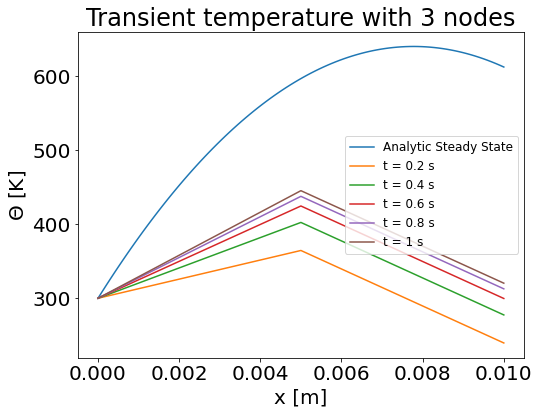

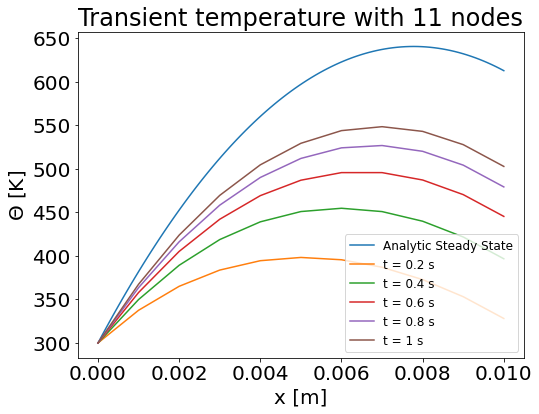

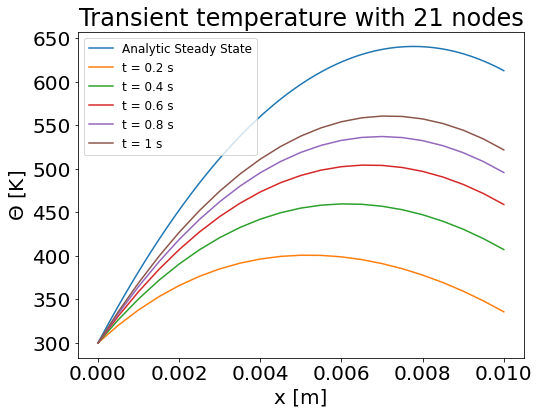

In [ ]:
def trnstempdistD(n):
  '''
  This function returns a transient temperature distribution for a given number of node
  '''
  # initializing temperature
  theta = [theta_o*np.ones(n)]

  # initializing nodes
  x = np.linspace(0,0.01,n)

  # initializing node spacing
  dx = np.copy(x[1])

  # initializing matrix multiplier
  A = -2*np.identity(n)+np.eye(n, k=-1)+np.eye(n, k=1)
  A[0] = np.zeros(n)
  A[-1] = np.zeros(n)

  # evaluating joule heating term
  JH = np.ones(n)*(a*J*E)
  JH[0] = 0
  JH[-1] = 0

  # transient temperature
  for i in range(len(t)-1):
    theta.append(theta[i] + dt*Kappa_o/(rho_o*C*dx**2)*A@theta[i] + dt/(rho_o*C)*JH)
    theta[-1][-1] = theta[-1][-2] + dx*-10**7/Kappa_o

  return theta


analyticD = lambda x: -a*J*E*x**2/(2*Kappa_o) + (a*J*E*L/Kappa_o - 10**7/Kappa_o)*x + theta_o


for n in [3, 11, 21]:
  # for 3 nodes
  fig = plt.figure(figsize = (8,6))
  x = np.linspace(0,0.01,n)
  thetaD = trnstempdistD(n)
  plt.rcParams.update({'font.size': 20})
  plt.plot(ax, analyticD(ax))
  plt.plot(x, thetaD[int(t_f/(5*dt))])
  plt.plot(x, thetaD[int(2*t_f/(5*dt))])
  plt.plot(x, thetaD[int(3*t_f/(5*dt))])
  plt.plot(x, thetaD[int(4*t_f/(5*dt))])
  plt.plot(x, thetaD[int(t_f/(dt))])
  plt.xlabel('x [m]')
  plt.ylabel('$\Theta$ [K]')
  plt.legend(['Analytic Steady State', 't = 0.2 s', 't = 0.4 s', 't = 0.6 s', 't = 0.8 s', 't = 1 s'], loc='best', fontsize = 12)
  plt.title(f'Transient temperature with {n} nodes')
  plt.show()

In [ ]:
dt = 10**-5 # s                            <---          Time step
t_f = 10 # s

#iniializing time
t=np.arange(0,t_f+10**-5, 10**-5)

def trnsTempSim(n, Kappa_o, fl):
  '''
  This function returns a transient temperature distribution for a given number of node
  '''
  
  # initializing temperature
  theta = [theta_o*np.ones(n)]

  # initializing nodes
  x = np.linspace(0,0.01,n)

  # initializing node spacing
  dx = np.copy(x[1])

  # initializing matrix multiplier
  A = -2*np.identity(n)+np.eye(n, k=-1)+np.eye(n, k=1)
  A[0] = np.zeros(n)
  A[-1] = np.zeros(n)

  # evaluating joule heating term
  JH = np.ones(n)*(a*J*E)
  JH[0] = 0
  JH[-1] = 0

  # transient temperature
  for i in range(len(t)-1):
    theta.append(theta[i] + dt*Kappa_o/(rho_o*C*dx**2)*A@theta[i] + dt/(rho_o*C)*JH)
    theta[-1][-1] = theta[-1][-2] + dx*fl/Kappa_o

  return np.max(theta[-1]), theta[-1][-1]

---------------------generation 1 ---------------------
K_o:  572.1914913264727 
fl:  -12145793.042204658
PI_min:  2.3288399615395213e-05
---------------------generation 2 ---------------------
K_o:  572.1914913264727 
fl:  -12145793.042204658
PI_min:  2.3288399615395213e-05
Parent_avg:  0.003982869080171729
---------------------generation 3 ---------------------
K_o:  580.9158908316459 
fl:  -12036920.316387208
PI_min:  1.6495513200100035e-05
Parent_avg:  0.001496984766205032
---------------------generation 4 ---------------------
K_o:  577.1706437539266 
fl:  -12083657.66008282
PI_min:  1.0438813150383015e-05
Parent_avg:  4.674586430168874e-05
---------------------generation 5 ---------------------
K_o:  578.5514256786856 
fl:  -12066426.73297789
PI_min:  1.0233945675292613e-05
Parent_avg:  1.0911488173501038e-05
---------------------generation 6 ---------------------
K_o:  578.1755011465468 
fl:  -12071117.935907252
PI_min:  1.0056309488692688e-05
Parent_avg:  1.0332915458790309e-05

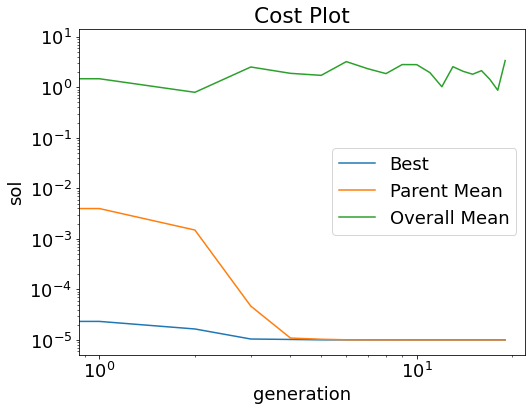

---------------------generation 1 ---------------------
K_o:  560.1550369169686 
fl:  -12662720.0877713
PI_min:  0.0009616267087315154
---------------------generation 2 ---------------------
K_o:  560.1550369169686 
fl:  -12662720.0877713
PI_min:  0.0009616267087315154
Parent_avg:  0.04783994040377964
---------------------generation 3 ---------------------
K_o:  560.1550369169686 
fl:  -12662720.0877713
PI_min:  0.0009616267087315154
Parent_avg:  0.001548913566515223
---------------------generation 4 ---------------------
K_o:  560.1550369169686 
fl:  -12662720.0877713
PI_min:  0.0009616267087315154
Parent_avg:  0.0010969913547629832
---------------------generation 5 ---------------------
K_o:  560.1550369169686 
fl:  -12662720.0877713
PI_min:  0.0009616267087315154
Parent_avg:  0.001029232024399653
---------------------generation 6 ---------------------
K_o:  560.1550369169686 
fl:  -12662720.0877713
PI_min:  0.0009616267087315154
Parent_avg:  0.0009890699282330212
-------------------

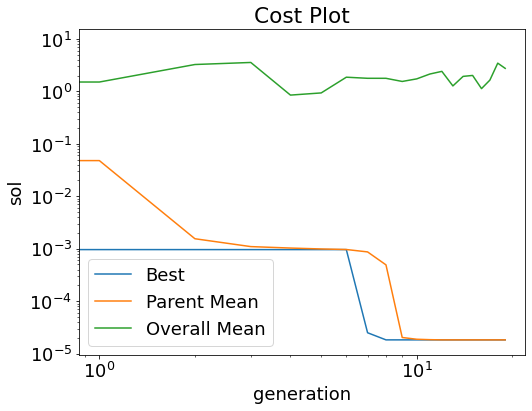

---------------------generation 1 ---------------------
K_o:  629.8664177483198 
fl:  -10884991.536214028
PI_min:  0.0031272444689979927
---------------------generation 2 ---------------------
K_o:  579.6125128767796 
fl:  -11812196.327933572
PI_min:  0.001340550530699544
Parent_avg:  0.004333645620406843
---------------------generation 3 ---------------------
K_o:  587.3962067757695 
fl:  -11695205.299641138
PI_min:  0.0011343416543614121
Parent_avg:  0.001438312066695283
---------------------generation 4 ---------------------
K_o:  587.3962067757695 
fl:  -11695205.299641138
PI_min:  0.0011343416543614121
Parent_avg:  0.0012825884588292182
---------------------generation 5 ---------------------
K_o:  587.3962067757695 
fl:  -11695205.299641138
PI_min:  0.0011343416543614121
Parent_avg:  0.001187244171309893
---------------------generation 6 ---------------------
K_o:  587.3962067757695 
fl:  -11695205.299641138
PI_min:  0.0011343416543614121
Parent_avg:  0.0011422669531776736
-------

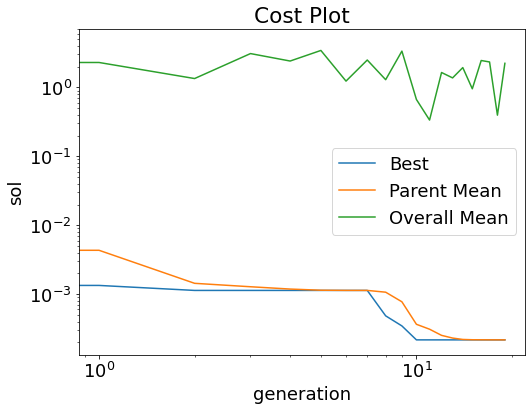

---------------------generation 1 ---------------------
K_o:  578.883689584722 
fl:  -12457571.02159402
PI_min:  0.0035754966257858186
---------------------generation 2 ---------------------
K_o:  578.883689584722 
fl:  -12457571.02159402
PI_min:  0.0035754966257858186
Parent_avg:  0.01523177516999436
---------------------generation 3 ---------------------
K_o:  567.948437622147 
fl:  -12308845.261061665
PI_min:  5.231061182763843e-07
Parent_avg:  0.0036322629787324985
---------------------generation 4 ---------------------
K_o:  567.948437622147 
fl:  -12308845.261061665
PI_min:  5.231061182763843e-07
Parent_avg:  0.0016132482174034933
---------------------generation 5 ---------------------
K_o:  567.948437622147 
fl:  -12308845.261061665
PI_min:  5.231061182763843e-07
Parent_avg:  5.6926662306258865e-05
---------------------generation 6 ---------------------
K_o:  567.948437622147 
fl:  -12308845.261061665
PI_min:  5.231061182763843e-07
Parent_avg:  4.548915743473455e-06
------------

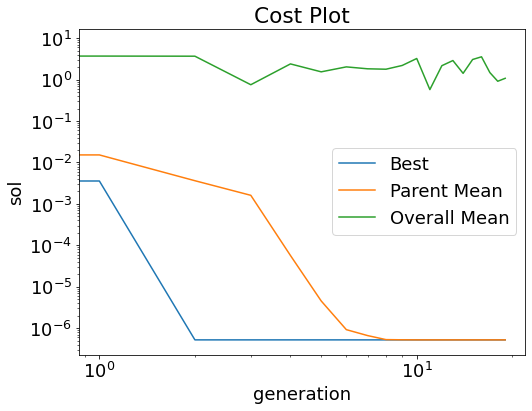

---------------------generation 1 ---------------------
K_o:  570.8247492497892 
fl:  -12235677.344865292
PI_min:  4.047427533755859e-08


/var/folders/c_/b7ll3wrs5v3ddlbyb85cqk280000gn/T/ipykernel_59294/3069777334.py:132: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.loglog()
/var/folders/c_/b7ll3wrs5v3ddlbyb85cqk280000gn/T/ipykernel_59294/3069777334.py:134: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig('Proj_2_figure_'+str(iter))


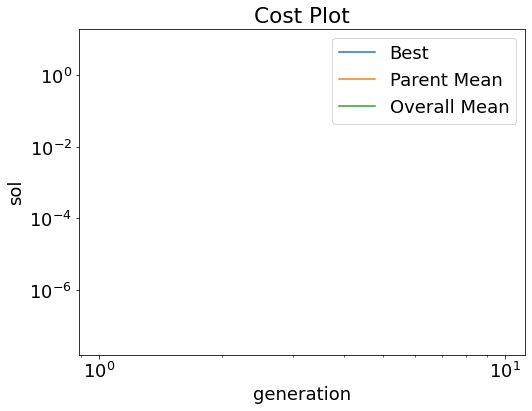

---------------------generation 1 ---------------------
K_o:  580.0648853026008 
fl:  -12283763.807425264
PI_min:  0.0008245991168463855
---------------------generation 2 ---------------------
K_o:  531.5258270326582 
fl:  -12979157.59500729
PI_min:  0.0008215681921558578
Parent_avg:  0.006244836783086865
---------------------generation 3 ---------------------
K_o:  553.1911518155648 
fl:  -12668769.7795661
PI_min:  0.00018597328568868105
Parent_avg:  0.0005974208249685218
---------------------generation 4 ---------------------
K_o:  553.2890015139062 
fl:  -12593959.658751164
PI_min:  4.9674532234965775e-05
Parent_avg:  0.00019565163807635356
---------------------generation 5 ---------------------
K_o:  553.2890015139062 
fl:  -12593959.658751164
PI_min:  4.9674532234965775e-05
Parent_avg:  8.274961438888707e-05
---------------------generation 6 ---------------------
K_o:  553.2890015139062 
fl:  -12593959.658751164
PI_min:  4.9674532234965775e-05
Parent_avg:  5.1985561006688815e-05
-

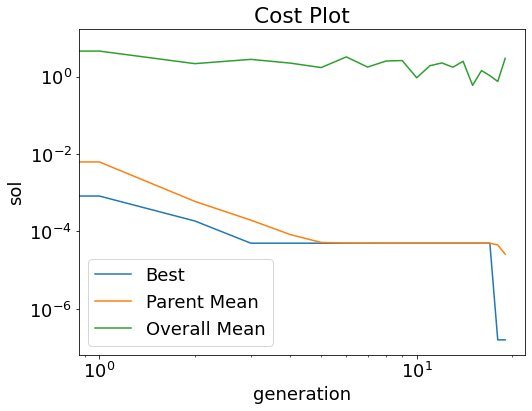

---------------------generation 1 ---------------------
K_o:  583.7822150396485 
fl:  -12271905.904638357
PI_min:  0.0016665327297376276
---------------------generation 2 ---------------------
K_o:  551.9629937155116 
fl:  -12708491.548567
PI_min:  0.00027504784124565815
Parent_avg:  0.02151838995336138
---------------------generation 3 ---------------------
K_o:  551.9629937155116 
fl:  -12708491.548567
PI_min:  0.00027504784124565815
Parent_avg:  0.0002842329526839038
---------------------generation 4 ---------------------
K_o:  551.9629937155116 
fl:  -12708491.548567
PI_min:  0.00027504784124565815
Parent_avg:  0.00027784274880058495
---------------------generation 5 ---------------------
K_o:  551.9629937155116 
fl:  -12708491.548567
PI_min:  0.00027504784124565815
Parent_avg:  0.0002757867204681322
---------------------generation 6 ---------------------
K_o:  568.5576623898872 
fl:  -12405119.982223809
PI_min:  0.00014022939895804798
Parent_avg:  0.00026171385860239904
----------

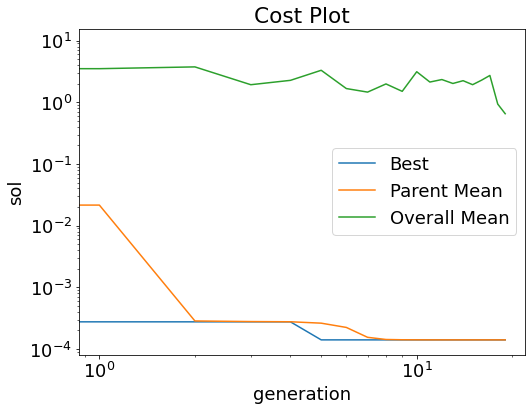

---------------------generation 1 ---------------------
K_o:  639.4242923298534 
fl:  -10641938.158418836
PI_min:  0.0052325784560140875
---------------------generation 2 ---------------------
K_o:  637.4203368560172 
fl:  -10925537.422994902
PI_min:  0.0022887271109674106
Parent_avg:  0.008430614339913729
---------------------generation 3 ---------------------
K_o:  620.553927664586 
fl:  -11377711.353482503
PI_min:  0.0018727983664925984
Parent_avg:  0.00226359323604602
---------------------generation 4 ---------------------
K_o:  620.553927664586 
fl:  -11377711.353482503
PI_min:  0.0018727983664925984
Parent_avg:  0.0021436656338289133
---------------------generation 5 ---------------------
K_o:  620.553927664586 
fl:  -11377711.353482503
PI_min:  0.0018727983664925984
Parent_avg:  0.0019715331504876355
---------------------generation 6 ---------------------
K_o:  620.553927664586 
fl:  -11377711.353482503
PI_min:  0.0018727983664925984
Parent_avg:  0.0019215816517910704
----------

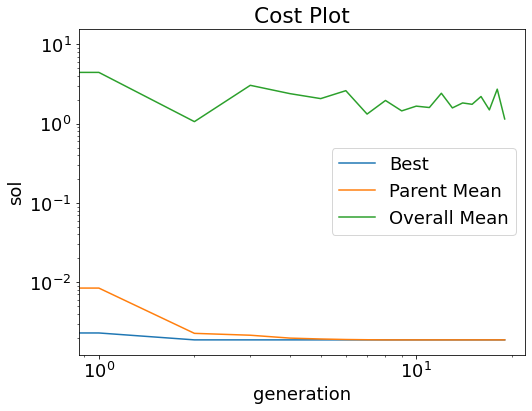

---------------------generation 1 ---------------------
K_o:  611.6348065698085 
fl:  -11557280.960841509
PI_min:  0.0012901858580264415
---------------------generation 2 ---------------------
K_o:  595.2635757724596 
fl:  -11635225.755298361
PI_min:  0.000498483687631467
Parent_avg:  0.0015501473830099332
---------------------generation 3 ---------------------
K_o:  584.8158992820327 
fl:  -12017338.659992855
PI_min:  8.756161805362645e-05
Parent_avg:  0.0004756585424416537
---------------------generation 4 ---------------------
K_o:  584.8158992820327 
fl:  -12017338.659992855
PI_min:  8.756161805362645e-05
Parent_avg:  0.00030193204281008825
---------------------generation 5 ---------------------
K_o:  580.114612654847 
fl:  -12128009.39092584
PI_min:  6.53588455563711e-05
Parent_avg:  0.0001235438349863557
---------------------generation 6 ---------------------
K_o:  580.114612654847 
fl:  -12128009.39092584
PI_min:  6.53588455563711e-05
Parent_avg:  8.305646077384117e-05
---------

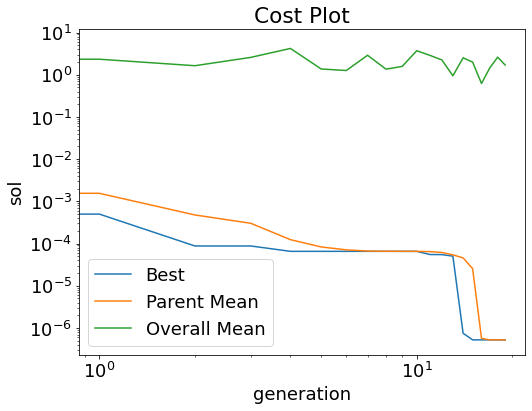

---------------------generation 1 ---------------------
K_o:  618.2190491724573 
fl:  -11527999.191744933
PI_min:  0.002923321917648142
---------------------generation 2 ---------------------
K_o:  571.7357949187118 
fl:  -12228363.143255496
PI_min:  4.205564729906211e-07
Parent_avg:  0.000778856432738427
---------------------generation 3 ---------------------
K_o:  569.0689643316721 
fl:  -12268544.323294068
PI_min:  9.934191895531477e-10
Parent_avg:  5.330023188859173e-05


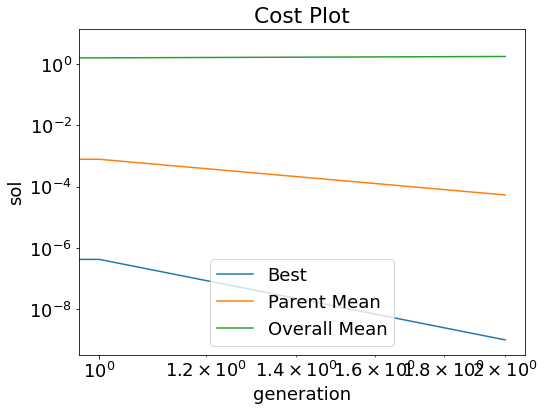

---------------------generation 1 ---------------------
K_o:  460.4670344169254 
fl:  -14568633.064265989
PI_min:  0.033722227215995756
---------------------generation 2 ---------------------
K_o:  545.4098200539067 
fl:  -12466003.522685181
PI_min:  0.002142005297426221
Parent_avg:  0.02575887830793539
---------------------generation 3 ---------------------
K_o:  538.023999848967 
fl:  -13021734.297439361
PI_min:  0.001123278481457205
Parent_avg:  0.003789682148734392
---------------------generation 4 ---------------------
K_o:  543.6057147637089 
fl:  -12601749.696141886
PI_min:  0.0009931943762485843
Parent_avg:  0.002119650557780251
---------------------generation 5 ---------------------
K_o:  540.1470103675686 
fl:  -12861992.759251818
PI_min:  0.00032205292124122407
Parent_avg:  0.000991161323139846
---------------------generation 6 ---------------------
K_o:  540.1470103675686 
fl:  -12861992.759251818
PI_min:  0.00032205292124122407
Parent_avg:  0.00039634412481333114
---------

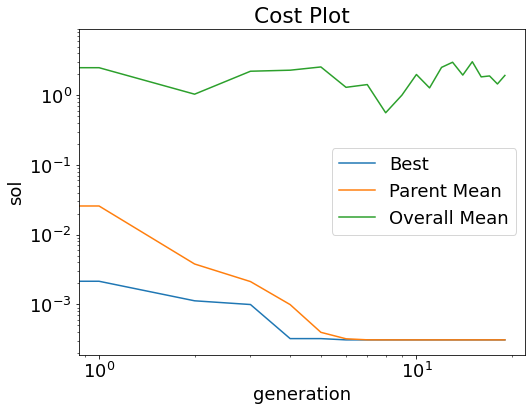

---------------------generation 1 ---------------------
K_o:  560.9580933477885 
fl:  -12751868.554109057
PI_min:  0.0028038741016319915
---------------------generation 2 ---------------------
K_o:  589.2802965596218 
fl:  -12055567.84355979
PI_min:  0.0006387262613189586
Parent_avg:  0.00843740598856221
---------------------generation 3 ---------------------
K_o:  585.3245150750422 
fl:  -12072144.538759056
PI_min:  0.00023973973070704185
Parent_avg:  0.0006137151346213063
---------------------generation 4 ---------------------
K_o:  585.3245150750422 
fl:  -12072144.538759056
PI_min:  0.00023973973070704185
Parent_avg:  0.0005795659548177951
---------------------generation 5 ---------------------
K_o:  585.3245150750422 
fl:  -12072144.538759056
PI_min:  0.00023973973070704185
Parent_avg:  0.0005344298940396022
---------------------generation 6 ---------------------
K_o:  585.3245150750422 
fl:  -12072144.538759056
PI_min:  0.00023973973070704185
Parent_avg:  0.00042096812050830833
-

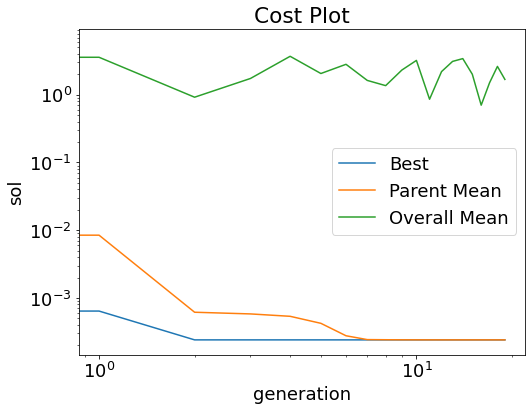

---------------------generation 1 ---------------------
K_o:  501.49175158643527 
fl:  -13035038.336485041
PI_min:  0.03406090282937166
---------------------generation 2 ---------------------
K_o:  567.2415804080949 
fl:  -12279348.61257479
PI_min:  1.7488517106324463e-06
Parent_avg:  0.031544513897035116
---------------------generation 3 ---------------------
K_o:  568.9201658070892 
fl:  -12290793.26666261
PI_min:  3.9892184201790595e-07
Parent_avg:  0.0007681257946982837
---------------------generation 4 ---------------------
K_o:  568.0592950184688 
fl:  -12284923.819450706
PI_min:  5.8281667104810985e-08
Parent_avg:  3.717570309699111e-07


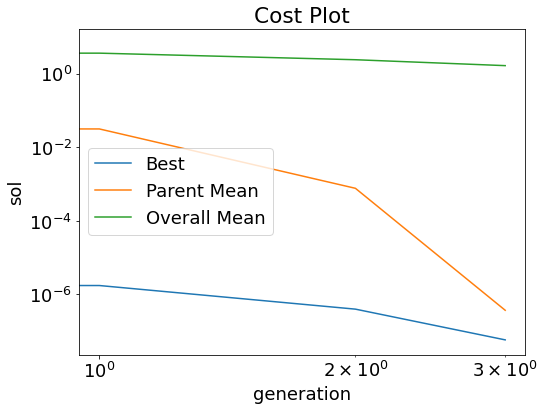

---------------------generation 1 ---------------------
K_o:  596.5108026750588 
fl:  -11807929.041857978
PI_min:  0.00036037642042438566
---------------------generation 2 ---------------------
K_o:  599.1699055340484 
fl:  -11637969.094337575
PI_min:  0.0002740326729007716
Parent_avg:  0.005149113237231975
---------------------generation 3 ---------------------
K_o:  568.0708127551968 
fl:  -12243638.565489383
PI_min:  7.0072667908907075e-06
Parent_avg:  0.00022714696921979273
---------------------generation 4 ---------------------
K_o:  569.6431540316913 
fl:  -12245231.372156657
PI_min:  2.2723792731494468e-07
Parent_avg:  9.015123069747094e-05
---------------------generation 5 ---------------------
K_o:  569.6431540316913 
fl:  -12245231.372156657
PI_min:  2.2723792731494468e-07
Parent_avg:  2.293701255383969e-07
---------------------generation 6 ---------------------
K_o:  569.6431540316913 
fl:  -12245231.372156657
PI_min:  2.2723792731494468e-07
Parent_avg:  2.2726733770039807e-

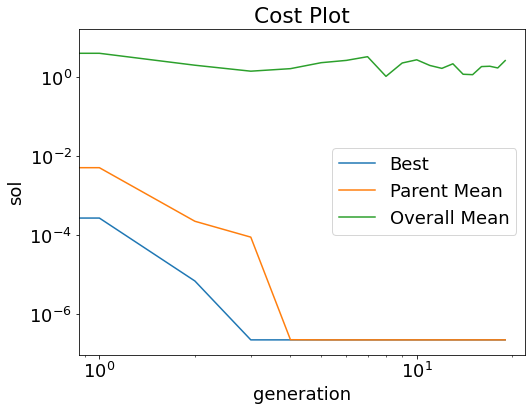

---------------------generation 1 ---------------------
K_o:  547.2121428023069 
fl:  -12886548.469161602
PI_min:  0.0011926545908813547
---------------------generation 2 ---------------------
K_o:  561.9597045943773 
fl:  -12188339.525120076
PI_min:  0.0007888979962324678
Parent_avg:  0.0026270381335835704
---------------------generation 3 ---------------------
K_o:  552.2579095506923 
fl:  -12647661.558705375
PI_min:  9.204169001165654e-05
Parent_avg:  0.0005489170104706491
---------------------generation 4 ---------------------
K_o:  552.2579095506923 
fl:  -12647661.558705375
PI_min:  9.204169001165654e-05
Parent_avg:  0.0001698756532606765
---------------------generation 5 ---------------------
K_o:  552.2579095506923 
fl:  -12647661.558705375
PI_min:  9.204169001165654e-05
Parent_avg:  0.00010332403515110901
---------------------generation 6 ---------------------
K_o:  552.2579095506923 
fl:  -12647661.558705375
PI_min:  9.204169001165654e-05
Parent_avg:  9.672922009306494e-05
--

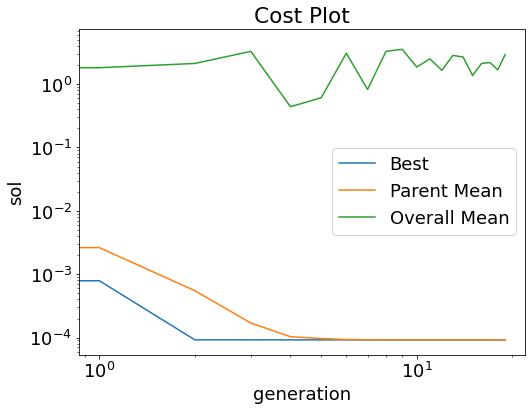

---------------------generation 1 ---------------------
K_o:  529.2568624333247 
fl:  -12790673.58882995
PI_min:  0.004041318132072914
---------------------generation 2 ---------------------
K_o:  577.1417827518644 
fl:  -12113950.855732616
PI_min:  5.347078176792481e-06
Parent_avg:  0.002188479359541604
---------------------generation 3 ---------------------
K_o:  577.1417827518644 
fl:  -12113950.855732616
PI_min:  5.347078176792481e-06
Parent_avg:  0.00011039888779672998
---------------------generation 4 ---------------------
K_o:  577.1417827518644 
fl:  -12113950.855732616
PI_min:  5.347078176792481e-06
Parent_avg:  5.4847635201895924e-06
---------------------generation 5 ---------------------
K_o:  577.1417827518644 
fl:  -12113950.855732616
PI_min:  5.347078176792481e-06
Parent_avg:  5.384472814302654e-06
---------------------generation 6 ---------------------
K_o:  577.1417827518644 
fl:  -12113950.855732616
PI_min:  5.347078176792481e-06
Parent_avg:  5.370186985731471e-06
----

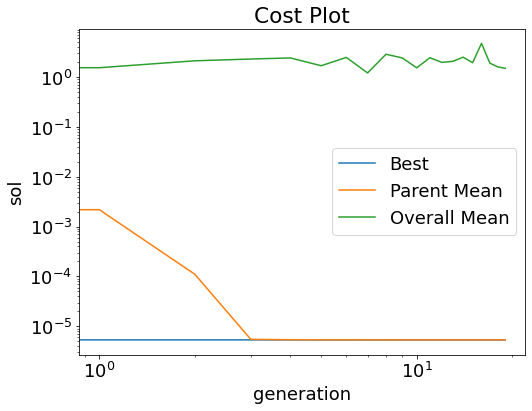

---------------------generation 1 ---------------------
K_o:  578.3589714686505 
fl:  -11630245.37968236
PI_min:  0.0071098488904971216
---------------------generation 2 ---------------------
K_o:  572.5641086330479 
fl:  -12021559.329461599
PI_min:  0.00044434394081183115
Parent_avg:  0.005016063220923665
---------------------generation 3 ---------------------
K_o:  590.3989910324099 
fl:  -11822719.522564787
PI_min:  0.00010078712948209355
Parent_avg:  0.00047197462460860936
---------------------generation 4 ---------------------
K_o:  587.8083838888496 
fl:  -11851602.013216335
PI_min:  9.85552499844838e-05
Parent_avg:  0.00016097684140046467
---------------------generation 5 ---------------------
K_o:  587.8083838888496 
fl:  -11851602.013216335
PI_min:  9.85552499844838e-05
Parent_avg:  9.905851022715125e-05
---------------------generation 6 ---------------------
K_o:  587.8083838888496 
fl:  -11851602.013216335
PI_min:  9.85552499844838e-05
Parent_avg:  9.863971767286354e-05
----

KeyboardInterrupt: ignored

In [ ]:
# Process Optimization
## Importing usefull libraries

GPmin = []
GK = []
Gfl = []
for iter in range(20):
  # Initializing genetic algorithm parameters
  children = 10
  parent = 10
  S = 30
  G = 20
  theta_des = 495 #K
  theta_L = 460 #K
  TOL = 10**-7
  w_1 = 1000
  w_2 = 1000

  # random number genration
  rng = np.random.default_rng()

  # generating K_o array of size S of values between 450 to 650
  K_o = 200*rng.random((S,1)) + 450

  # generating fl array of size S of values between -2*10^7 to -10^7
  fl = 10**7*rng.random((S,1)) - 2*10**7

  # organizing d and J values generated for the genetic algorithm
  Lambda = np.hstack([K_o, fl])

  # running the numerical simulation over the generated population
  sim_res = [trnsTempSim(21, Lambda[i,0],Lambda[i,1]) for i in range(S)]

  # evaluating the cost of each member of the population
  new_pi = [w_1*(np.abs(sim_res[i][0]-theta_des)/theta_des)**3 + w_2*(np.abs(sim_res[i][1]-theta_L)/theta_L)**3 for i in range(S)]

  # initializing the generation count
  g = 1

  # labeling the data
  dtype = [('Lambda1', float), ('Lambda2', float), ('new_pi', float)]

  # Organzing the data for each member of the population
  Pi=[]
  for _ in range(S):
      Pi.append((Lambda[_][0], Lambda[_][1], new_pi[_]))

  # converting to an array and sorting the list of the population over the new pi
  Pi1 = np.array(Pi, dtype=dtype)
  Sorted_Pi = np.sort(Pi1, order='new_pi')

  g = 1

  # initializing variable tracking the GA performance
  Parent_avg = []
  PI_avg = []
  PI_min = []
  Sol1 = []
  Sol2 = []

  PI_min.append(Sorted_Pi['new_pi'][0])
  Parent_avg.append(Sorted_Pi['new_pi'][0:10].mean())
  PI_avg.append(Sorted_Pi['new_pi'].mean())
  Sol1.append(Sorted_Pi['Lambda1'][0])
  Sol2.append(Sorted_Pi['Lambda2'][0])
  print('---------------------generation', g, '---------------------')
  print('K_o: ', Sol1[-1], '\nfl: ', Sol2[-1])
  print('PI_min: ', PI_min[-1])
  #==========================================================================================================================
  # genetic algorithm iteration
  while PI_min[-1]>=TOL and g<G:
      g+=1
      Lamda = []
      for p in 2*np.arange(0,5):
          phi1 = rng.random()
          phi2 = rng.random()
          
          ## mating parents to produce children that replaces worse parents
          Sorted_Pi['Lambda1'][p+6] =  phi1*Sorted_Pi['Lambda1'][p] + (1-phi1)*Sorted_Pi['Lambda1'][p+1]
          Sorted_Pi['Lambda2'][p+6] =  phi1*Sorted_Pi['Lambda2'][p] + (1-phi1)*Sorted_Pi['Lambda2'][p+1]
          Sorted_Pi['Lambda1'][p+7] =  phi2*Sorted_Pi['Lambda1'][p] + (1-phi2)*Sorted_Pi['Lambda1'][p+1]
          Sorted_Pi['Lambda2'][p+7] =  phi2*Sorted_Pi['Lambda2'][p] + (1-phi2)*Sorted_Pi['Lambda2'][p+1]
          
          ##evaluating new pi
          sim_res_child1 = trnsTempSim(21, Sorted_Pi['Lambda1'][p+6],Sorted_Pi['Lambda2'][p+6])
          sim_res_child2 = trnsTempSim(21, Sorted_Pi['Lambda1'][p+7],Sorted_Pi['Lambda2'][p+7])
          
          Sorted_Pi['new_pi'][p+6] =  w_1*(np.abs(sim_res_child1[0]-theta_des)/theta_des)**3 + w_2*(np.abs(sim_res_child1[1]-theta_L)/theta_L)**3 
          Sorted_Pi['new_pi'][p+7] =  w_1*(np.abs(sim_res_child2[0]-theta_des)/theta_des)**3 + w_2*(np.abs(sim_res_child2[1]-theta_L)/theta_L)**3
          
          
          
      ## generating new random values
      for N in range(20,S):
          Sorted_Pi['Lambda1'][N] =  200*rng.random() + 450
          Sorted_Pi['Lambda2'][N] =  10**7*rng.random() - 2*10**7
          
          ##evaluating new pi
          sim_res_new = trnsTempSim(21, Sorted_Pi['Lambda1'][N],Sorted_Pi['Lambda2'][N])
          Sorted_Pi['new_pi'][N] =  w_1*(np.abs(sim_res_new[0]-theta_des)/theta_des)**3 + w_2*(np.abs(sim_res_new[1]-theta_L)/theta_L)**3 
          
      ## sorting and appending values    
      Sorted_Pi = np.sort(Sorted_Pi, order='new_pi')
      PI_min.append(Sorted_Pi['new_pi'][0])
      Parent_avg.append(Sorted_Pi['new_pi'][0:10].mean())
      PI_avg.append(Sorted_Pi['new_pi'].mean())
      Sol1.append(Sorted_Pi['Lambda1'][0])
      Sol2.append(Sorted_Pi['Lambda2'][0])
      print('---------------------generation', g, '---------------------')
      print('K_o: ', Sol1[-1], '\nfl: ', Sol2[-1])
      print('PI_min: ', PI_min[-1])
      print('Parent_avg: ', Parent_avg[-1])
  #==========================================================================================================================
  # Plotting solution
  GPmin.append(PI_min[-1])
  GK.append(Sorted_Pi['Lambda1'][0])
  Gfl.append(Sorted_Pi['Lambda2'][0])

  fig = plt.figure(figsize = (8,6))
  plt.rcParams.update({'font.size': 18})
  plt.plot(PI_min, label = 'Best')
  plt.plot(Parent_avg, label = 'Parent Mean')
  plt.plot(PI_avg, label = 'Overall Mean')
  # plt.plot(Sol1, label = '$\lambda1$')
  # plt.plot(Sol2, label = '$\lambda2$')
  # naming the x axis
  plt.xlabel('generation')
  # naming the y axis
  plt.ylabel('sol')
  # giving a title to my graph
  plt.title('Cost Plot')
  plt.loglog()
  plt.legend()
  plt.savefig('Proj_2_figure_'+str(iter))
  plt.show()

In [ ]:
def trnsTempSimBest(n, Kappa_o, fl):
  '''
  This function returns a transient temperature distribution for a given number of node
  '''
  
  # initializing temperature
  theta = [theta_o*np.ones(n)]

  # initializing nodes
  x = np.linspace(0,0.01,n)

  # initializing node spacing
  dx = np.copy(x[1])

  # initializing matrix multiplier
  A = -2*np.identity(n)+np.eye(n, k=-1)+np.eye(n, k=1)
  A[0] = np.zeros(n)
  A[-1] = np.zeros(n)

  # evaluating joule heating term
  JH = np.ones(n)*(a*J*E)
  JH[0] = 0
  JH[-1] = 0

  # transient temperature
  for i in range(len(t)-1):
    theta.append(theta[i] + dt*Kappa_o/(rho_o*C*dx**2)*A@theta[i] + dt/(rho_o*C)*JH)
    theta[-1][-1] = theta[-1][-2] + dx*fl/Kappa_o

  return theta[-1]

thetaBest = trnsTempSimBest(21, 569.07, -1.2268*10**7)

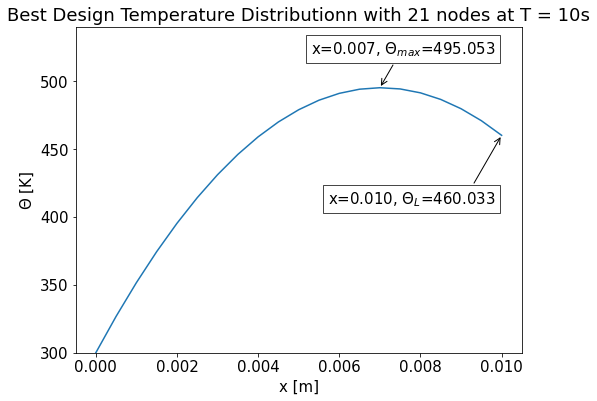

In [ ]:
fig = plt.figure(figsize = (8,6))
x = np.linspace(0,0.01,21)

plt.rcParams.update({'font.size': 15})

plt.plot(x, thetaBest)
plt.xlabel('x [m]')
plt.ylabel('$\Theta$ [K]')

# Creating max value annotation
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = np.max(y)
    max = 'max'
    text= f"x={xmax:.3f}, " + "$\Theta_{max}$" + f"={ymax:.3f}"
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

# Creating last value annotation
def annot_last(x,y, ax=None):
    xmax = x[-1]
    ymax = y[-1]
    text= "x={:.3f}, $\Theta_L$={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.5), **kw)

annot_max(x,thetaBest)
annot_last(x,thetaBest)

plt.ylim(300,540)
plt.title(f'Best Design Temperature Distributionn with 21 nodes at T = 10s')
plt.show()

In [ ]:
w_1*(np.abs(np.max(thetaBest)-theta_des)/theta_des)**3 + w_2*(np.abs(thetaBest[-1]-theta_L)/theta_L)**3

1.6211563513191679e-09